# Processamento de Imagens

# Atividade 1 - Point Processing e Histogramas



```
# Isto está formatado como código
```

Nome Completo: Gabriel Henrique Silva

RGM: 5830922887

Data: 12/03/24

## **Exercícios**

#### 1. Para cada uma das transformações de point-processing vista em aula, defina **sua própria função que implementa a transformação (não utilize o OpenCV)**, escolha uma imagem da lista e aplique a trasformação com a função criada.
#### Mostre também para cada transformação um gráfico com a curva que relaciona os valores de entrada e saída.

Lista de transformações point-processing:
*   Inversão
*   Limiarização
*   Transformação log
*   Lei de Potência (gama > 1)
*   Lei de Potência (gama < 1)

<ipython-input-1-5a0e80e42b45>:20: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * (np.log(image + 1)) # Nesta linha, a transformação logarítmica é aplicada à imagem. Primeiro, é adicionado 1 a todos os valores da imagem original para evitar problemas com o logaritmo de zero. Em seguida, é calculado o logaritmo natural de cada valor da imagem adicionado de 1, e o resultado é multiplicado pela constante c. Isso comprime a faixa dinâmica dos valores de intensidade da imagem original, realçando detalhes em regiões mais escuras.
<ipython-input-1-5a0e80e42b45>:21: RuntimeWarning: invalid value encountered in cast
  return log_transformed_image.astype(np.uint8) # A imagem transformada é retornada como um array de inteiros de 8 bits sem sinal (np.uint8), pois os valores de intensidade de pixels devem ser inteiros não negativos de 0 a 255.


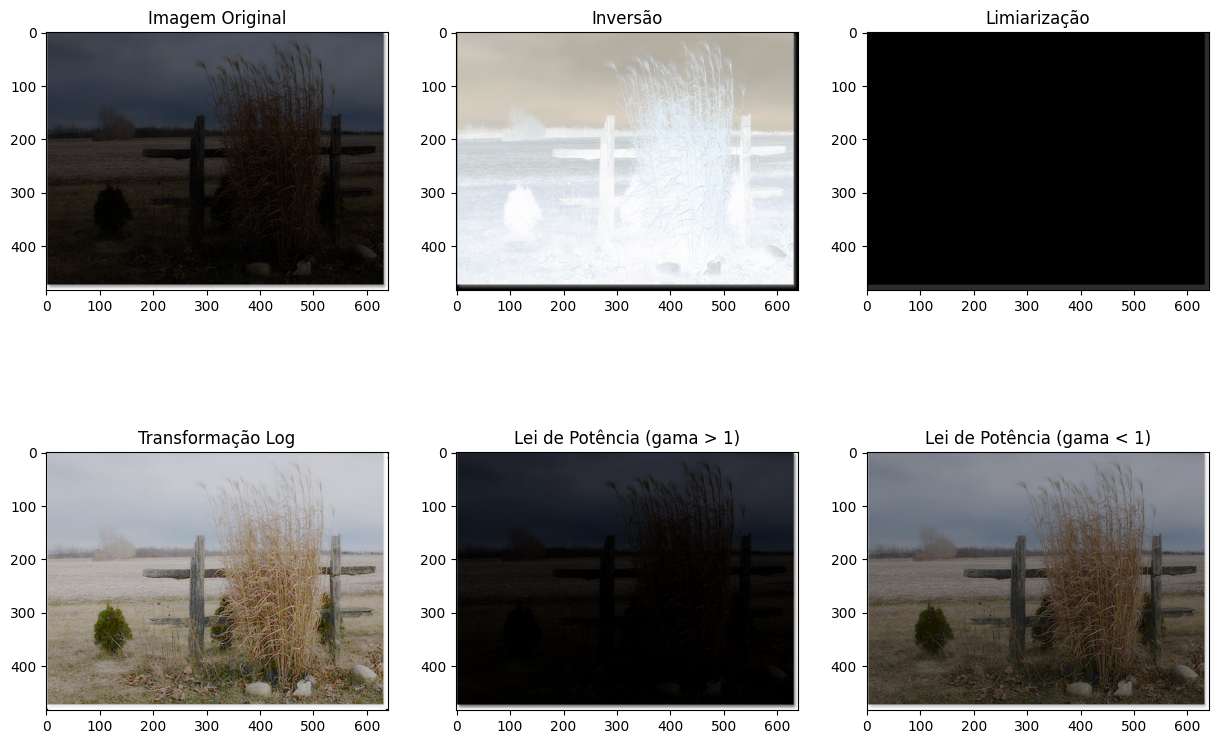

In [ ]:
import numpy as np # Numpy é uma biblioteca para computação numérica em Python. Ela oferece suporte a arrays multidimensionais e funções matemáticas que operam nesses arrays de forma eficiente. É amplamente usada em ciência de dados, aprendizado de máquina, processamento de sinais e outras áreas onde a computação numérica é essencial.
import matplotlib.pyplot as plt # Matplotlib é uma biblioteca para criação de gráficos em Python.
import requests # Requests é uma biblioteca HTTP para Python, que permite enviar requisições HTTP facilmente.
from PIL import Image # PIL é uma biblioteca para manipulação de imagens em Python.
from io import BytesIO # O módulo io fornece ferramentas para trabalhar com streams de entrada/saída em Python.

# Função para inversão
def inversao(image):  # Esta linha define uma função chamada inversao que recebe um parâmetro image. Inverter uma imagem.
    inverted_image = 255 - image    # O valor 255 representa o valor máximo de intensidade de cor em uma imagem de 8 bits (usualmente representada como um valor entre 0 e 255). Para inverter a imagem, subtraímos cada valor de pixel da imagem original de 255. Isso resulta na inversão dos valores de intensidade de cor. Pixels mais escuros se tornarão mais claros e vice-versa.
    return inverted_image # sta linha retorna a imagem invertida que foi calculada na linha anterior.

# Função para limiarização
def limiarizacao(image, threshold):  # Esta linha define uma função chamada limiarizacao que recebe dois parâmetros: image, que é a imagem de entrada que será limiarizada, e threshold, que é o valor de limiar que será usado para binarizar a imagem.
    thresholded_image = np.where(image >= threshold, 300, 0).astype(np.uint8)  # Nesta linha, a função np.where() é utilizada para aplicar a limiarização. Para cada pixel na imagem de entrada (image), verifica-se se o valor do pixel é maior ou igual ao limiar especificado (threshold). Se for maior ou igual, atribui-se o valor 300 ao pixel na imagem resultante; caso contrário, atribui-se o valor 0. Isso resulta em uma imagem binarizada, onde os pixels com intensidades acima do limiar se tornam brancos (300) e os pixels com intensidades abaixo do limiar se tornam pretos (0).
    return thresholded_image # Por fim, a imagem binarizada é retornada pela função.

# Função para transformação log
def transformacao_log(image): # Esta linha define uma função chamada transformacao_log que recebe uma imagem como parâmetro de entrada. Essa função tem a intenção de realizar a transformação logarítmica na imagem.
    c = 255 / np.log(1 + np.max(image)) # Aqui, é calculado o valor de c, que é uma constante utilizada na transformação logarítmica para ajustar a faixa dinâmica da imagem resultante. É calculado como 255 dividido pelo logaritmo natural de 1 mais o valor máximo presente na imagem original.
    log_transformed_image = c * (np.log(image + 1)) # Nesta linha, a transformação logarítmica é aplicada à imagem. Primeiro, é adicionado 1 a todos os valores da imagem original para evitar problemas com o logaritmo de zero. Em seguida, é calculado o logaritmo natural de cada valor da imagem adicionado de 1, e o resultado é multiplicado pela constante c. Isso comprime a faixa dinâmica dos valores de intensidade da imagem original, realçando detalhes em regiões mais escuras.
    return log_transformed_image.astype(np.uint8) # A imagem transformada é retornada como um array de inteiros de 8 bits sem sinal (np.uint8), pois os valores de intensidade de pixels devem ser inteiros não negativos de 0 a 255.

# Função para lei de potência (gama > 1)
def lei_potencia_gama_maior_que_1(image, gamma):
    power_transformed_image = np.power(image, gamma)
    return np.uint8(255 * (power_transformed_image / np.max(power_transformed_image)))

# Função para lei de potência (gama < 1)
def lei_potencia_gama_menor_que_1(image, gamma):  # Esta função recebe uma imagem e um parâmetro gamma, que representa o valor do expoente na transformação da lei de potência. Essa transformação é aplicada quando o gamma é maior que 1.
    power_transformed_image = np.power(image, gamma) # Aqui, é aplicada a transformação da lei de potência na imagem. Cada pixel da imagem é elevado à potência especificada pelo parâmetro gamma, utilizando a função np.power().
    return np.uint8(255 * (power_transformed_image / np.max(power_transformed_image))) # Imagem transformada é normalizada para o intervalo de 0 a 255, convertendo-a para o tipo de dados np.uint8, que são inteiros sem sinal de 8 bits. Isso é feito dividindo cada valor de pixel pelo valor máximo na imagem transformada e multiplicando por 255. Isso garante que a imagem resultante tenha uma faixa dinâmica adequada para exibição.

# Carregar a imagem a partir do URL fornecido
url = "https://pe-images.s3.amazonaws.com/photo-editing/cc/tone-and-color/brightness-contrast/image-uselegacyoff-brightnessmin.jpg"  # URL da imagem a ser carregada.
response = requests.get(url) # Realiza uma solicitação GET para obter os dados da imagem no URL.
image = Image.open(BytesIO(response.content)) # Abre a imagem usando a biblioteca PIL (Python Imaging Library).

# Definindo os parâmetros para as transformações
threshold_value = 127 # Definições de parâmetros.
gamma_maior_que_1 = 1.5 # Definições de parâmetros.
gamma_menor_que_1 = 0.5 # Definições de parâmetros.

# Convertendo a imagem para uma matriz numpy
image_np = np.array(image) # Convertendo a imagem para uma matriz numpy

# Aplicando as transformações
inverted_image = inversao(image_np) # Nesta linha, a função inversao() é chamada, passando a imagem original image_np como argumento. Isso resulta em uma imagem invertida, que é atribuída à variável inverted_image.
thresholded_image = limiarizacao(image_np, threshold_value) # Aqui, a função limiarizacao() é chamada, passando a imagem original image_np e o valor de limiar threshold_value como argumentos. Isso resulta em uma imagem binarizada, que é atribuída à variável thresholded_image.
log_transformed_image = transformacao_log(image_np) # Nesta linha, a função transformacao_log() é chamada, passando a imagem original image_np como argumento. Isso resulta em uma imagem transformada pela transformação logarítmica, que é atribuída à variável log_transformed_image.
gamma_greater_than_1_transformed_image = lei_potencia_gama_maior_que_1(image_np, gamma_maior_que_1) # Aqui, a função lei_potencia_gama_maior_que_1() é chamada, passando a imagem original image_np e o valor de gama gamma_maior_que_1 como argumentos. Isso resulta em uma imagem transformada pela lei de potência com gama maior que 1, que é atribuída à variável gamma_greater_than_1_transformed_image.
gamma_less_than_1_transformed_image = lei_potencia_gama_menor_que_1(image_np, gamma_menor_que_1) # Nesta linha, a função lei_potencia_gama_menor_que_1() é chamada, passando a imagem original image_np e o valor de gama gamma_menor_que_1 como argumentos. Isso resulta em uma imagem transformada pela lei de potência com gama menor que 1, que é atribuída à variável gamma_less_than_1_transformed_image.

# Plotando as imagens
plt.figure(figsize=(15, 10)) # Aqui, uma nova figura é criada com o tamanho especificado de 15 unidades de largura por 10 unidades de altura, utilizando plt.figure(figsize=(15, 10)).

# Esta parte do código cria o primeiro subplot na grade com 2 linhas e 3 colunas, posicionado na primeira posição. A imagem original é exibida neste subplot com plt.imshow(image_np), e o título "Imagem Original" é definido com plt.title('Imagem Original').
# Esses padrões se repetem para os próximos subplots, com cada transformação sendo plotada em um subplot separado. Por fim, plt.show() é usado para exibir a figura completa com todos os subplots.
plt.subplot(2, 3, 1)
plt.imshow(image_np)
plt.title('Imagem Original')

plt.subplot(2, 3, 2)
plt.imshow(inverted_image)
plt.title('Inversão')

plt.subplot(2, 3, 3)
plt.imshow(thresholded_image)
plt.title('Limiarização')

plt.subplot(2, 3, 4)
plt.imshow(log_transformed_image)
plt.title('Transformação Log')

plt.subplot(2, 3, 5)
plt.imshow(gamma_greater_than_1_transformed_image)
plt.title('Lei de Potência (gama > 1)')

plt.subplot(2, 3, 6)
plt.imshow(gamma_less_than_1_transformed_image)
plt.title('Lei de Potência (gama < 1)')

plt.show()


In [ ]:
url_1 = "https://pe-images.s3.amazonaws.com/photo-editing/cc/tone-and-color/brightness-contrast/image-uselegacyoff-brightnessmin.jpg"
url_2 = "https://media.cheggcdn.com/media/df3/df3c284b-a776-404a-81e7-96f6487c383f/phpONQILA"
url_3 = "https://img.freepik.com/premium-vector/white-black-gradient-square-shape_118124-11165.jpg"
url_4 = "https://i.stack.imgur.com/TPVnd.png"
url_5 = "https://pbs.twimg.com/profile_images/128974112/smallPout_400x400.png"

#### 2.  Mostre uma comparação lado a lado das imagens e uma comparação dos histogramas (antes e depois) para cada uma das transformações implementadas.

Obs.: Utilize titulos para identificar as imagens antes/depois

<ipython-input-4-77cab0b284f3>:18: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * (np.log(image + 1))
<ipython-input-4-77cab0b284f3>:19: RuntimeWarning: invalid value encountered in cast
  return log_transformed_image.astype(np.uint8)


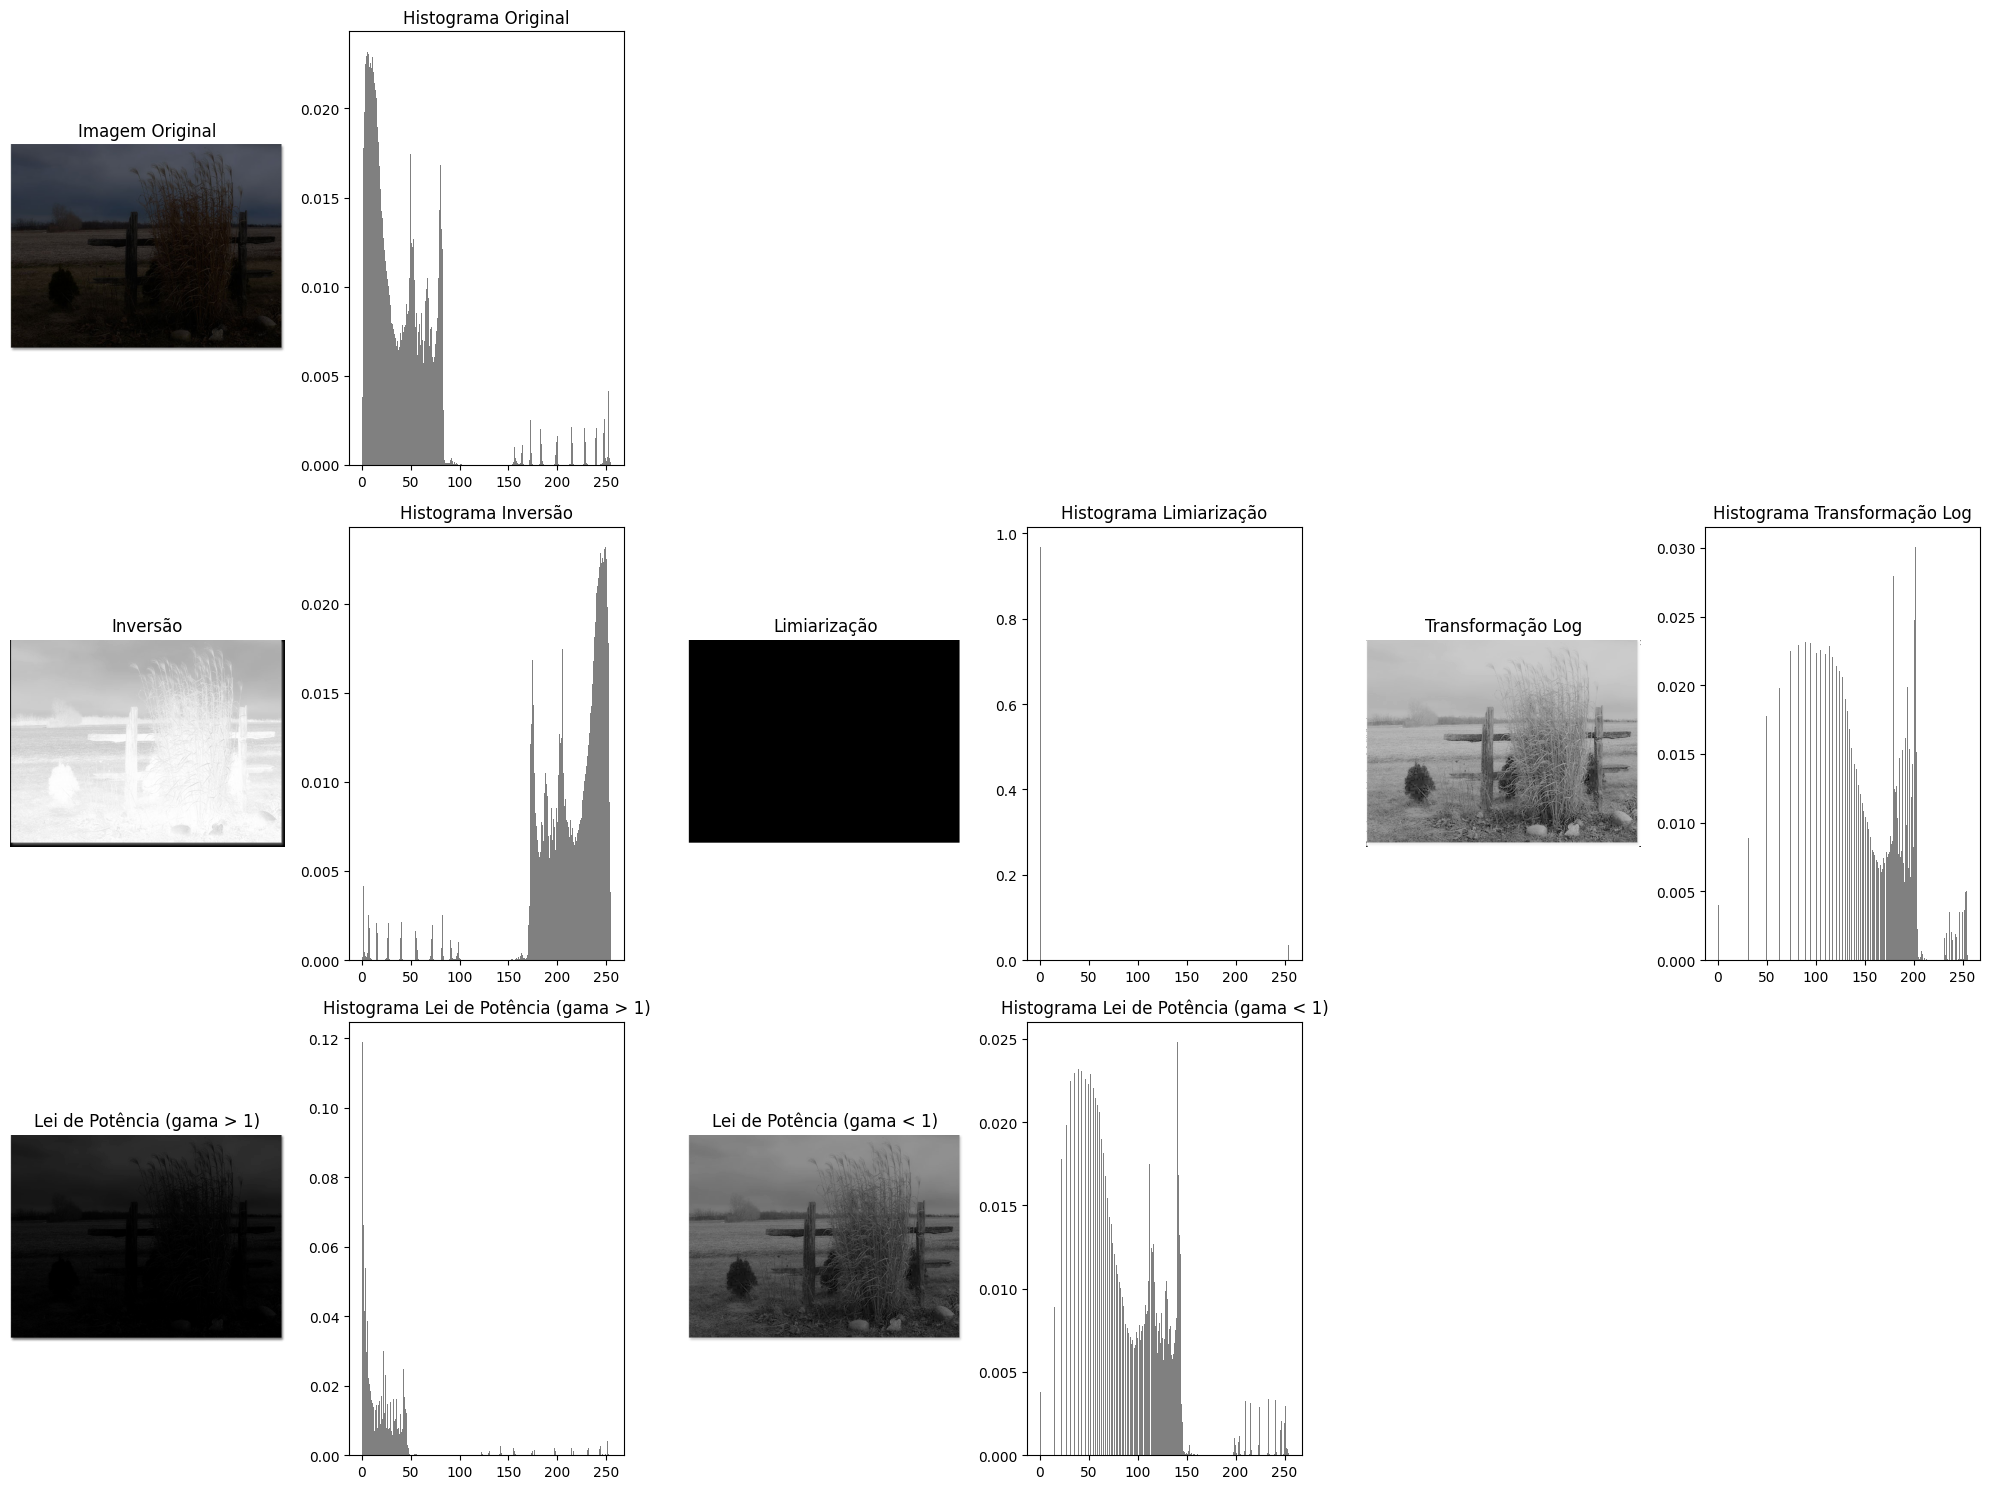

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Funções de transformação
def inversao(image):
    inverted_image = 255 - image
    return inverted_image

def limiarizacao(image, threshold):
    thresholded_image = np.where(image >= threshold, 255, 0).astype(np.uint8)
    return thresholded_image

def transformacao_log(image):
    c = 255 / np.log(1 + np.max(image))
    log_transformed_image = c * (np.log(image + 1))
    return log_transformed_image.astype(np.uint8)

def lei_potencia_gama_maior_que_1(image, gamma):
    power_transformed_image = np.power(image, gamma)
    return np.uint8(255 * (power_transformed_image / np.max(power_transformed_image)))

def lei_potencia_gama_menor_que_1(image, gamma):
    power_transformed_image = np.power(image, gamma)
    return np.uint8(255 * (power_transformed_image / np.max(power_transformed_image)))

# Carregar a imagem
url = "https://pe-images.s3.amazonaws.com/photo-editing/cc/tone-and-color/brightness-contrast/image-uselegacyoff-brightnessmin.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Converter a imagem para escala de cinza
image_gray = image.convert('L')
image_np = np.array(image_gray)

# Definir parâmetros
threshold_value = 127
gamma_maior_que_1 = 1.5
gamma_menor_que_1 = 0.5

# Aplicar transformações
inverted_image = inversao(image_np)
thresholded_image = limiarizacao(image_np, threshold_value)
log_transformed_image = transformacao_log(image_np)
gamma_greater_than_1_transformed_image = lei_potencia_gama_maior_que_1(image_np, gamma_maior_que_1)
gamma_less_than_1_transformed_image = lei_potencia_gama_menor_que_1(image_np, gamma_menor_que_1)

# Plotar as imagens e histogramas
plt.figure(figsize=(20, 15))

# Imagem original
plt.subplot(3, 6, 1)
plt.imshow(image)
plt.title('Imagem Original')
plt.axis('off')

# Histograma original
plt.subplot(3, 6, 2)
plt.hist(image_np.ravel(), bins=256, range=(0, 255), density=True, color='gray')
plt.title('Histograma Original')

# Imagens transformadas
transformations = [
    (inverted_image, 'Inversão'),
    (thresholded_image, 'Limiarização'),
    (log_transformed_image, 'Transformação Log'),
    (gamma_greater_than_1_transformed_image, 'Lei de Potência (gama > 1)'),
    (gamma_less_than_1_transformed_image, 'Lei de Potência (gama < 1)')
]

for i, (transformed_image, title) in enumerate(transformations, start=3):
    plt.subplot(3, 6, i*2+1)
    plt.imshow(transformed_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Histograma transformado
    plt.subplot(3, 6, i*2+2)
    plt.hist(transformed_image.ravel(), bins=256, range=(0, 255), density=True, color='gray')
    plt.title('Histograma ' + title)

plt.tight_layout()
plt.show()
